In [108]:
filepath = '/Users/tillteb/Big_data/Projekt/TEST_START/images/weather_image_recognition'
import re
import pandas as pd
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def reader(filepath):
    current_path = filepath 
    for foldername in os.listdir(current_path):
        folderpath = os.path.join(filepath, foldername)
        current_path = folderpath
        if os.path.isdir(folderpath) and not foldername.startswith('.'):
            os.chdir(folderpath)
            for file in os.listdir(folderpath):
                if file.endswith(".jpg") or file.endswith(".png"): 
                    with open(os.path.join(folderpath, file), "rb") as f:
                        for row in f:
                            image = f.read()
                        #read file as b´ str.
                        img = cv2.imread(file)
                        
                        # create a 3d array for a colour histogram and convert to 1d array
                        #hist = cv2.calcHist([img], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
                        #hist_flat = np.ravel(hist)
                        
                        # output a 3d array for a colour histogram 
                        #print(f'shape: {hist.shape}')
                        #colors = ['blue', 'green', 'red']
                        #hist_colours = [cv2.calcHist([img], [i], None, [256], [0, 256]) for i in range(3)]
                        
                        # get max_brightness
                        #max_brighness = np.sum(img, axis=2).max()
                        
                    yield(img)
            os.chdir('..')
            
            
gen = reader(filepath)
next(gen)

array([[[95, 78, 87],
        [95, 78, 87],
        [95, 78, 87],
        ...,
        [28, 28, 16],
        [28, 28, 16],
        [28, 28, 16]],

       [[95, 78, 87],
        [95, 78, 87],
        [95, 78, 87],
        ...,
        [29, 29, 17],
        [28, 28, 16],
        [28, 28, 16]],

       [[95, 78, 87],
        [95, 78, 87],
        [95, 78, 87],
        ...,
        [29, 29, 17],
        [29, 29, 17],
        [29, 29, 17]],

       ...,

       [[90, 91, 82],
        [79, 80, 71],
        [88, 89, 80],
        ...,
        [85, 86, 77],
        [85, 86, 77],
        [85, 86, 77]],

       [[78, 79, 70],
        [88, 89, 80],
        [87, 88, 79],
        ...,
        [85, 86, 77],
        [85, 86, 77],
        [85, 86, 77]],

       [[89, 90, 81],
        [85, 86, 77],
        [83, 84, 75],
        ...,
        [85, 86, 77],
        [85, 86, 77],
        [85, 86, 77]]], dtype=uint8)

In [120]:
def create_one_d_array(img):   #: d_type
    ### create a 3d array for a colour histogram and convert to 1d array
    
    hist = cv2.calcHist([img], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
    hist_flat = np.ravel(hist)
    plt.figure()
    plt.title('Farbhistogramm')
    plt.xlabel('Häufigkeit von Farbwerten')
    plt.ylabel('Position der Pixel')
    plt.plot(hist_flat)
    plt.show()
    return(hist_flat)

def create_rgb_array(img):
    colors = ['red', 'green', 'blue']  # ? Woher wissen wir das? Warum nicht =  ['blue', 'green', 'red']
    hist_colours = [cv2.calcHist([img], [i], None, [256], [0, 256]) for i in range(3)]
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    # Farbprofile plotten
    for i in range(3):
        axs[i].plot(hist_colours[i], color=colors[i])
        axs[i].set_title('{}s Farbprofil'.format(colors[i].capitalize()))
        axs[i].set_xlabel('Farbwert')
        axs[i].set_ylabel('Häufigkeit')
    plt.show()
    return(hist_colours)

def get_max_brightness(img):
    max_brighness = np.sum(img, axis=2).max()
    print(f'maximal brighness : {max_brighness}')
    return(max_brighness)

def display_image(img):
    plt.imshow(img)
    plt.axis(False)
    plt.show()


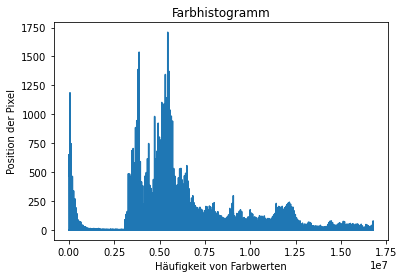

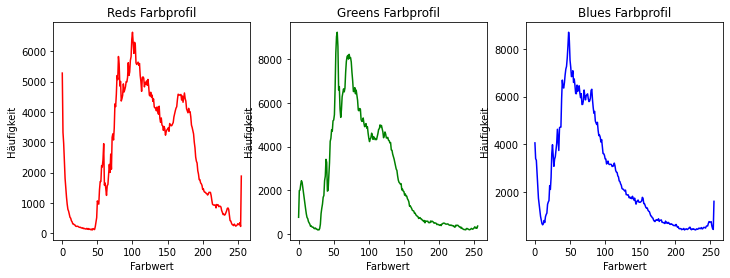

maximal brighness : 765


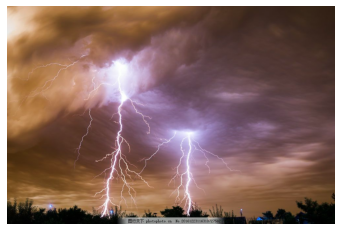

In [121]:
next_pic = next(gen)
next_pic

create_one_d_array(next_pic)
create_rgb_array(next_pic)
get_max_brightness(next_pic)
display_image(next_pic)